**SETUP INSTRUCTIONS**

Run each cell below to set up the environment. Make sure to adjust the subject ID and path variables.
Run pupilLabsDebug BEFORE this program to ensure measurements are as expected.

In [1]:
path_base = 'C:/Users/kebl6975/Documents/GitHub/cvd_pupillometry/subjectdata/'
# can add subject number + date
subject_id = 3
subj_base = 'plr-60s-sub-003_ses-02_dat-20230714' # plr-ISI-sub-subjectID-ses-sesID-dat-date - sub-xxx-ses-xx-dat-yyyymmdd

In [2]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

Light engine is now set up, and so it is now possible to access the methods from the REST API. 

C:\Users\kebl6975\Documents\GitHub\cvd_pupillometry\pyplr\calibrate.py:368: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for led, df in self.data.groupby(["led"]):
C:\Users\kebl6975\Documents\GitHub\cvd_pupillometry\pyplr\calibrate.py:369: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lkp_tbl = lkp_tbl.append(self.interp_led_spectra(led, df))
C:\Users\kebl6975\Documents\GitHub\cvd_pupillometry\pyplr\calibrate.py:369: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lkp_tbl = lkp_tbl.append(self.interp_led_spectra(led, df))
C:\Users\kebl6975\Documents\GitHub\cvd_pupillometry\pyplr\calibrate.py:369: FutureWarning: The frame.append method is de

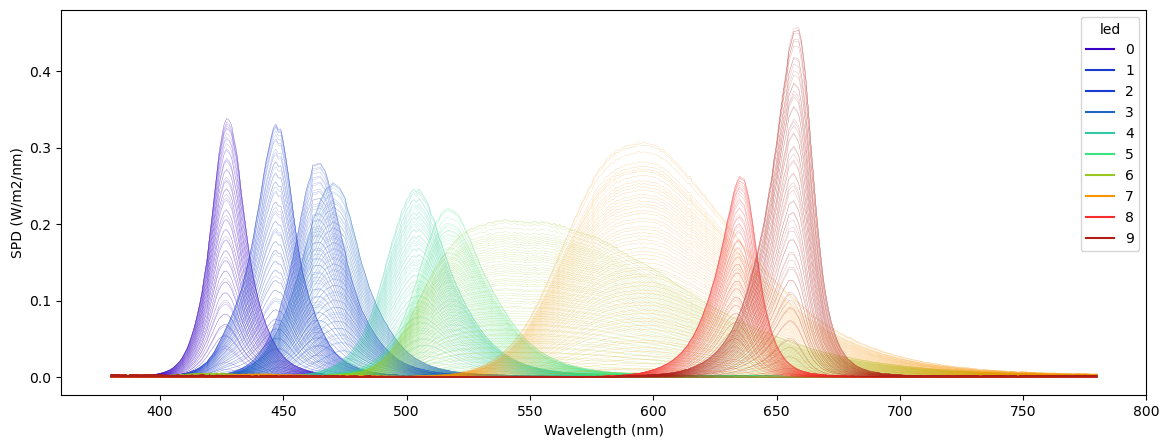

In [3]:
# from pyplr.calibrate import CalibrationContext as calibrationContext
# Calibration - important
import pyplr.calibrate as calb
from importlib import reload
reload(calb)
# file type to be read must be in format of:
# led | intensity | wavelength 1 (380) | wavelength 2 | ... | wavelength n (780)

cc = calb.CalibrationContext(
    'S2_corrected_oo_spectra.csv', binwidth=1)
_ = cc.plot_calibrated_spectra()


In [5]:
# calculate the peak spectral sensitivity for each LED at its maximum intensity setting
cc.lkp.xs(key=4095, level=1).idxmax(axis=1)

led
0    427
1    447
2    465
3    470
4    505
5    517
6    540
7    594
8    635
9    659
dtype: int64

In [6]:
from pyplr import stlab

#50mW spec - retrieved from examples/pfr/stimuli/PLR-3000-50-mw.dsf
white_spec = [176, 184, 80, 0, 0, 0, 308, 122, 0, 0]
d.turn_off()

<Response [200]>

In [7]:
from time import sleep
# import random # not using this library unless we want to randomize stims
from pyplr.pupil import PupilCore
from pyplr.utils import unpack_data_pandas
from pyplr.protocol import input_subject_id, subject_dir
# Connect to Pupil Core
p = PupilCore()
p.check_3d_model()

> Refit the 3d model? [y/n]: n


Please enter subject ID: 003
> Grabbing 225 seconds of pupil.1.3d
> Waiting for a light to stamp...
> Light stamped on frame.world at 162907.48483099998
> Waiting for a light to stamp...
> Light stamped on frame.world at 162973.995191
> Waiting for a light to stamp...
> Light stamped on frame.world at 163040.39753299998
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
> PupilGrabber done grabbing 225 seconds of pupil.1.3d


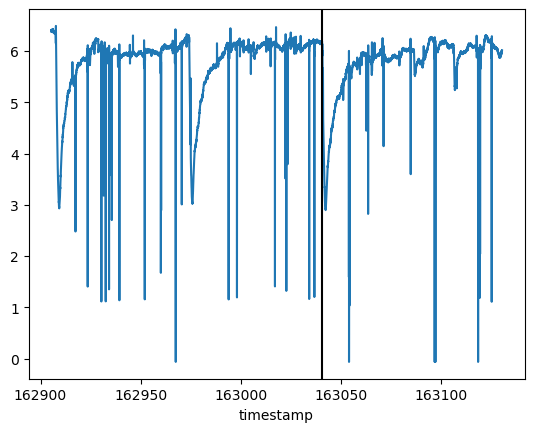

In [8]:
# PIPR STIMS - USE THIS ONE
d.turn_off()
subject_id = input_subject_id()
subj_dir = subject_dir(subject_id)
sleep(2)
ISI = 60 # interstimulus time, in seconds
num_trials = 3 # total number of trials
run_time = ISI*num_trials + 5*num_trials + 30 # appropriate offset to account for stim duration + sleeps


# Start a new recording called "my_recording"
p.command('R my_recording')

# Wait a few seconds
sleep(2)

# Make an annotation for when the light comes on
annotation = p.new_annotation('LIGHT_ON')

# Start the .light_stamper(...) and .pupil_grabber(...)
# this only captures one eye
# pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=25) # time here is TOTAL run time
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=run_time) # time here is TOTAL run time

sleep(2)
##################################
# Administer light stimulus here #
i = 0
# random.shuffle(led_list) # use this if stims should be randomized
while (i < num_trials):
    intensities = white_spec
    lst_future = p.light_stamper(annotation=annotation, timeout=10)
    d.set_spectrum_a(intensities)
    sleep(1.)
    d.turn_off()
    sleep(ISI)
    i+=1
    sleep(5) # make sure there is extra time so that trials do not overlap
##################################

# Wait for the futures
while lst_future.running() or pgr_future.running():
    print('Waiting for futures...')
    sleep(1)

# End recording
p.command('r')

# Get the timestamp and pupil data
timestamp = lst_future.result()[1]
data = unpack_data_pandas(pgr_future.result())
# timestamps are displayed in the output as well
# Plot the PLR
ax = data['diameter_3d'].plot()
ax.axvline(x=timestamp, color='k')

,id,topic,method,norm_pos,diameter,confidence,sphere,projected_sphere,circle_3d,diameter_3d,ellipse,location,model_confidence,theta,phi
timestamp,,,,,,,,,,,,,,,
162905.294086,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.24959320173315502, 0.8243648044347365]",63.265729,0.992434,"{'center': [-0.3478598927751146, -3.1665990214...","{'center': [93.45140976588566, 74.087275204508...","{'center': [-5.217051051563638, -6.71912371999...",6.405102,"{'center': [47.921894732765765, 33.72195754853...","[47.921894732765765, 33.721957548530604]",1.0,1.919672,-2.092749
162905.313341,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.25005325262939737, 0.8244389407734508]",62.977513,0.986579,"{'center': [-0.3478598927751146, -3.1665990214...","{'center': [93.45140976588566, 74.087275204508...","{'center': [-5.207533891397707, -6.71851963615...",6.373295,"{'center': [48.010224504844295, 33.70772337149...","[48.010224504844295, 33.707723371497444]",1.0,1.919611,-2.091612
162905.334561,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.24953218484320994, 0.8241694545174252]",63.142282,1.000000,"{'center': [-0.3478598927751146, -3.1665990214...","{'center': [93.45140976588566, 74.087275204508...","{'center': [-5.218286969172416, -6.71682677202...",6.391538,"{'center': [47.91017948989631, 33.759464732654...","[47.91017948989631, 33.759464732654365]",1.0,1.919437,-2.092845
162905.360037,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.24954512052439834, 0.8233823284851578]",63.284648,1.000000,"{'center': [-0.3478598927751146, -3.1665990214...","{'center': [93.45140976588566, 74.087275204508...","{'center': [-5.207467397759772, -6.70827361268...",6.406513,"{'center': [47.91266314068448, 33.910592930849...","[47.91266314068448, 33.91059293084971]",1.0,1.918562,-2.091386
162905.382611,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.24940740252185958, 0.8233443113178052]",63.185756,1.000000,"{'center': [-0.3478598927751146, -3.1665990214...","{'center': [93.45140976588566, 74.087275204508...","{'center': [-5.21447640371396, -6.706223831950...",6.395748,"{'center': [47.88622128419704, 33.917892226981...","[47.88622128419704, 33.9178922269814]",1.0,1.918352,-2.092169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163130.221061,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.23958060713523918, 0.7948291645372]",60.572849,0.983097,"{'center': [-0.18772678552361893, -3.400281900...","{'center': [94.5423891981775, 72.2198534929149...","{'center': [-5.2412700559421115, -5.6909097992...",6.009102,"{'center': [45.99947656996592, 39.392800408857...","[45.99947656996592, 39.39280040885761]",1.0,1.793037,-2.092708
163130.231944,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.23982771266690425, 0.7946447943404573]",60.511502,0.988203,"{'center': [-0.18772678552361893, -3.400281900...","{'center': [94.5423891981775, 72.2198534929149...","{'center': [-5.244497582820468, -5.69194013141...",6.001733,"{'center': [46.046920832045615, 39.42819948663...","[46.046920832045615, 39.42819948663219]",1.0,1.793139,-2.093089
163130.255096,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.239751171547771, 0.7946539770988913]",60.413242,0.899210,"{'center': [-0.18772678552361893, -3.400281900...","{'center': [94.5423891981775, 72.2198534929149...","{'center': [-5.258936134231799, -5.69437690076...",5.990873,"{'center': [46.03222493717203, 39.426436397012...","[46.03222493717203, 39.42643639701288]",1.0,1.793379,-2.094765


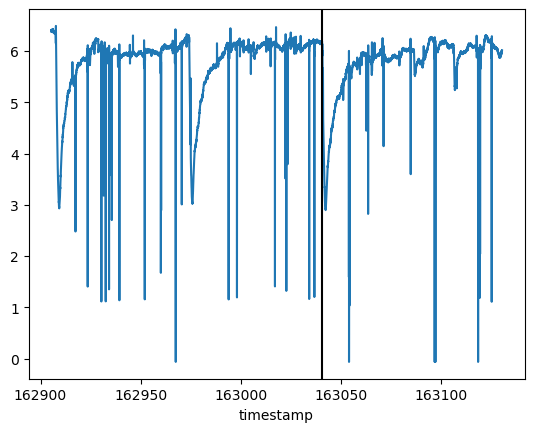

In [9]:
data = unpack_data_pandas(pgr_future.result())
# timestamps are displayed in the output as well
# Plot the PLR
ax = data['diameter_3d'].plot()
ax.axvline(x=timestamp, color='k')
# display data from pandas table
data

In [10]:
import os  

# os.makedirs('C:/Users/kebl6975/Documents/GitHub/cvd_pupillometry/subjectdata', exist_ok=True) 

data.to_csv(path_base + subj_base + '.csv')

**DATA PROCESSING BEGINS BELOW**

In [11]:
samples = data
samples

,id,topic,method,norm_pos,diameter,confidence,sphere,projected_sphere,circle_3d,diameter_3d,ellipse,location,model_confidence,theta,phi
timestamp,,,,,,,,,,,,,,,
162905.294086,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.24959320173315502, 0.8243648044347365]",63.265729,0.992434,"{'center': [-0.3478598927751146, -3.1665990214...","{'center': [93.45140976588566, 74.087275204508...","{'center': [-5.217051051563638, -6.71912371999...",6.405102,"{'center': [47.921894732765765, 33.72195754853...","[47.921894732765765, 33.721957548530604]",1.0,1.919672,-2.092749
162905.313341,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.25005325262939737, 0.8244389407734508]",62.977513,0.986579,"{'center': [-0.3478598927751146, -3.1665990214...","{'center': [93.45140976588566, 74.087275204508...","{'center': [-5.207533891397707, -6.71851963615...",6.373295,"{'center': [48.010224504844295, 33.70772337149...","[48.010224504844295, 33.707723371497444]",1.0,1.919611,-2.091612
162905.334561,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.24953218484320994, 0.8241694545174252]",63.142282,1.000000,"{'center': [-0.3478598927751146, -3.1665990214...","{'center': [93.45140976588566, 74.087275204508...","{'center': [-5.218286969172416, -6.71682677202...",6.391538,"{'center': [47.91017948989631, 33.759464732654...","[47.91017948989631, 33.759464732654365]",1.0,1.919437,-2.092845
162905.360037,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.24954512052439834, 0.8233823284851578]",63.284648,1.000000,"{'center': [-0.3478598927751146, -3.1665990214...","{'center': [93.45140976588566, 74.087275204508...","{'center': [-5.207467397759772, -6.70827361268...",6.406513,"{'center': [47.91266314068448, 33.910592930849...","[47.91266314068448, 33.91059293084971]",1.0,1.918562,-2.091386
162905.382611,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.24940740252185958, 0.8233443113178052]",63.185756,1.000000,"{'center': [-0.3478598927751146, -3.1665990214...","{'center': [93.45140976588566, 74.087275204508...","{'center': [-5.21447640371396, -6.706223831950...",6.395748,"{'center': [47.88622128419704, 33.917892226981...","[47.88622128419704, 33.9178922269814]",1.0,1.918352,-2.092169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163130.221061,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.23958060713523918, 0.7948291645372]",60.572849,0.983097,"{'center': [-0.18772678552361893, -3.400281900...","{'center': [94.5423891981775, 72.2198534929149...","{'center': [-5.2412700559421115, -5.6909097992...",6.009102,"{'center': [45.99947656996592, 39.392800408857...","[45.99947656996592, 39.39280040885761]",1.0,1.793037,-2.092708
163130.231944,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.23982771266690425, 0.7946447943404573]",60.511502,0.988203,"{'center': [-0.18772678552361893, -3.400281900...","{'center': [94.5423891981775, 72.2198534929149...","{'center': [-5.244497582820468, -5.69194013141...",6.001733,"{'center': [46.046920832045615, 39.42819948663...","[46.046920832045615, 39.42819948663219]",1.0,1.793139,-2.093089
163130.255096,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.239751171547771, 0.7946539770988913]",60.413242,0.899210,"{'center': [-0.18772678552361893, -3.400281900...","{'center': [94.5423891981775, 72.2198534929149...","{'center': [-5.258936134231799, -5.69437690076...",5.990873,"{'center': [46.03222493717203, 39.426436397012...","[46.03222493717203, 39.42643639701288]",1.0,1.793379,-2.094765


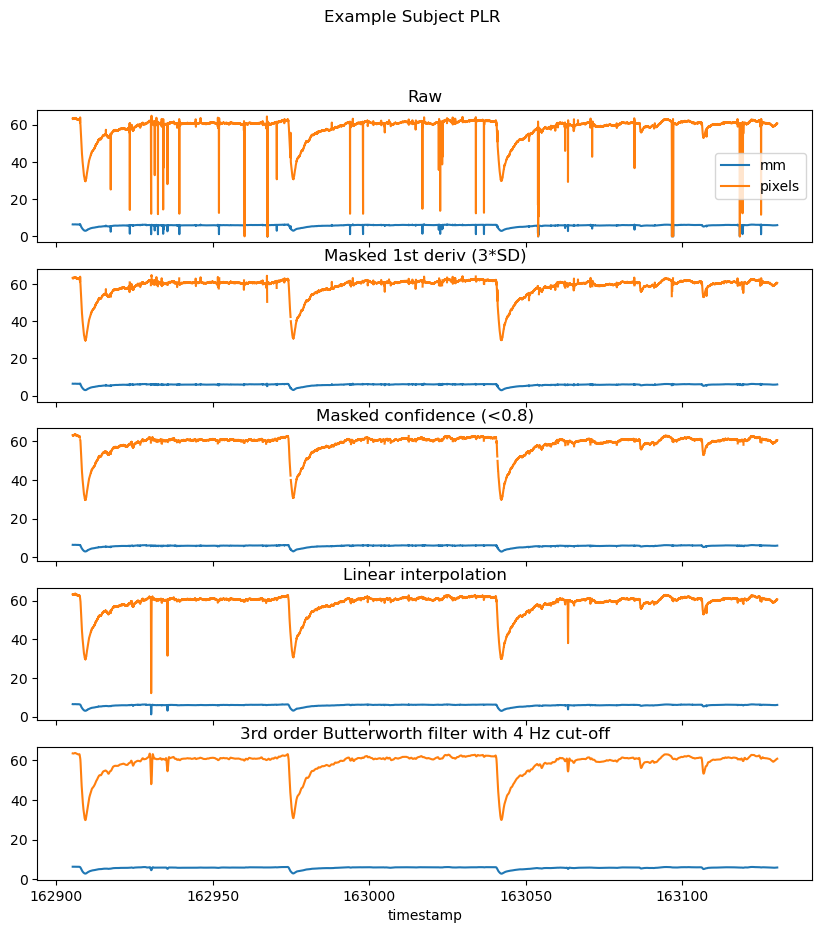

In [12]:
from pyplr import graphing
from pyplr import preproc
import matplotlib.pyplot as plt

# Sampling frequency
SAMPLE_RATE = 120

# Pupil columns to analyse
pupil_cols = ['diameter_3d', 'diameter']

# Make figure for processing
#f, axs = graphing.pupil_preprocessing(nrows=4, subject='Example')
fig, axs = plt.subplots(5, sharex=True, figsize=(10,10))
fig.suptitle('Example Subject PLR')

# Plot the raw data
samples[pupil_cols].plot(title='Raw', ax=axs[0], legend=True)
axs[0].legend(loc='center right', labels=['mm', 'pixels'])

# Mask first derivative
samples = preproc.mask_pupil_first_derivative(
    samples, threshold=3.0, mask_cols=pupil_cols)
samples[pupil_cols].plot(
    title='Masked 1st deriv (3*SD)', ax=axs[1], legend=False)

# Mask confidence
samples = preproc.mask_pupil_confidence(
    samples, threshold=0.8, mask_cols=pupil_cols)
samples[pupil_cols].plot(
    title='Masked confidence (<0.8)', ax=axs[2], legend=False)

# Interpolate
samples = preproc.interpolate_pupil(
    samples, interp_cols=pupil_cols)
samples[pupil_cols].plot(
    title='Linear interpolation', ax=axs[3], legend=False)

# Smooth
samples = preproc.butterworth_series(
    samples, fields=pupil_cols, filt_order=3,
    cutoff_freq=4/(SAMPLE_RATE/2))
samples[pupil_cols].plot(
    title='3rd order Butterworth filter with 4 Hz cut-off',
    ax=axs[4], legend=False);

In [13]:
# export butterworth processed sample data (?)
samples.to_csv(path_base + subj_base + '-butterworth.csv') # raw data
# stop here, run second protocol

**STOP HERE - RUN SECOND PROGRAM**

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [15]:
# df_pipr = samples # this is the smoothed out data
df_pipr = pd.read_csv(path_base + subj_base + '-butterworth.csv')

# Print header names
print(df_pipr.columns)

# Extract the column with header "timestamp"
timestamps = df_pipr["timestamp"]
# Extract the column with header "diameter_3d"
diam_3d = df_pipr["diameter_3d"]

Index(['timestamp', 'id', 'topic', 'method', 'norm_pos', 'diameter',
       'confidence', 'sphere', 'projected_sphere', 'circle_3d', 'diameter_3d',
       'ellipse', 'location', 'model_confidence', 'theta', 'phi',
       'interpolated'],
      dtype='object')


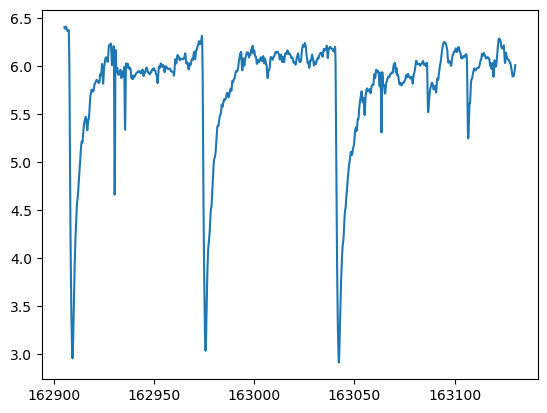

In [16]:
fig = plt.figure()
plt.plot(timestamps, diam_3d) # this should be the smoothed out data - if not, check

This is copied from the output of cell 11
> Light stamped on frame.world at 162907.48483099998
> Waiting for a light to stamp...
> Light stamped on frame.world at 162973.995191
> Waiting for a light to stamp...
> Light stamped on frame.world at 163040.39753299998

**Edit Cell Below with Timestamps**

In [17]:
# NEED TO EDIT THIS WITH NEW TIMESTAMPS
# finds indices of each timestamp (or closest one before, if exact match cannot be found).
# finds list of timestamps where condition is true, extracts array of just this, then takes last value (closest stamp)
stamp1 = np.where(timestamps <= 162907.48483099998)[0][-1]
stamp2 = np.where(timestamps <= 162973.995191)[0][-1]
stamp3 = np.where(timestamps <= 163040.39753299998)[0][-1]
stamps = [stamp1, stamp2, stamp3]
stamps

[101, 3144, 6102]

In [18]:
from pyplr import utils
from copy import deepcopy

In [19]:
df_data = df_pipr[['timestamp', 'confidence','id','diameter','diameter_3d']]
df_data

,timestamp,confidence,id,diameter,diameter_3d
0,162905.294086,0.992434,1,63.260953,6.404741
1,162905.313341,0.986579,1,63.250103,6.402924
2,162905.334561,1.000000,1,63.239621,6.401142
3,162905.360037,1.000000,1,63.229744,6.399420
4,162905.382611,1.000000,1,63.220690,6.397779
...,...,...,...,...,...
10345,163130.221061,0.983097,1,60.556067,6.001753
10346,163130.231944,0.988203,1,60.568100,6.004004
10347,163130.255096,0.899210,1,60.578924,6.006060
10348,163130.279845,1.000000,1,60.588622,6.007918


In [20]:
# extract ranges from samples based on event timing and sample count
# adapted from extract() from utils.py
# set variables - change as necessary
samples = df_data
event_starts = stamps 
onset_time = 1
duration_time = 60
offset = -60*onset_time # 60 sample rate, start 1s before light to get baseline
duration = 60*duration_time  # 60 sample rate

# find the indexes of the event starts, and offset by sample count
range_idxs = (
    np.searchsorted(samples.index, event_starts, "left") + offset
)
range_duration = duration


In [21]:
range_idxs

array([  41, 3084, 6042], dtype=int64)

In [22]:
# make a hierarchical index
samples["orig_idx"] = samples.index
midx = pd.MultiIndex.from_product(
    [list(range(len(event_starts))), list(range(range_duration))],
    names=["event", "onset"],
)

# TODO: can add option for time index here

# get the samples
df = pd.DataFrame()
idx = 0
for start_idx in range_idxs:
    # get the start time and add the required number of indices
    end_idx = start_idx + range_duration - 1  # .loc indexing is inclusive
    if end_idx >= len(samples):
        end_idx = len(samples) - 1
    new_df = deepcopy(
        samples.loc[samples.index[start_idx] : samples.index[end_idx]]
    )
    #for ba in borrow_attributes:
        #new_df[ba] = events.iloc[idx].get(ba, float("nan"))
    df = pd.concat([df, new_df])
    idx += 1
df.index = midx
print("Extracted ranges for {} events".format(len(event_starts)))

Extracted ranges for 3 events


C:\Users\kebl6975\AppData\Local\Temp\ipykernel_22124\2016008756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samples["orig_idx"] = samples.index


In [23]:
df.index

MultiIndex([(0,    0),
            (0,    1),
            (0,    2),
            (0,    3),
            (0,    4),
            (0,    5),
            (0,    6),
            (0,    7),
            (0,    8),
            (0,    9),
            ...
            (2, 3590),
            (2, 3591),
            (2, 3592),
            (2, 3593),
            (2, 3594),
            (2, 3595),
            (2, 3596),
            (2, 3597),
            (2, 3598),
            (2, 3599)],
           names=['event', 'onset'], length=10800)

In [24]:
from pyplr import graphing
from pyplr import preproc
# Calculate baselines
baselines = df.loc[:, range(0, -offset), :].mean(level=0)

# New columns for percent signal change
df = preproc.percent_signal_change(
    df, baselines, ['diameter_3d', 'diameter'])
df

C:\Users\kebl6975\AppData\Local\Temp\ipykernel_22124\3396287333.py:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  baselines = df.loc[:, range(0, -offset), :].mean(level=0)


timestamp  confidence  id   diameter  diameter_3d  orig_idx  \
event onset                                                                    
0     0      162906.142421    1.000000   1  63.436064     6.410248        41   
      1      162906.165565    1.000000   1  63.425885     6.409018        42   
      2      162906.181642    1.000000   1  63.413825     6.407545        43   
      3      162906.202222    1.000000   1  63.400103     6.405855        44   
      4      162906.228245    1.000000   1  63.384957     6.403978        45   
...                    ...         ...  ..        ...          ...       ...   
2     3595   163115.496873    0.920451   1  60.933670     6.086915      9637   
      3596   163115.520029    0.963264   1  60.920097     6.085482      9638   
      3597   163115.546137    0.933641   1  60.908156     6.084234      9639   
      3598   163115.566823    0.931140   1  60.897978     6.083179      9640   
      3599   163115.589527    0.981435   1  60.889626     6.082317      9641   

             diameter_3d_pc  diameter_pc  
event onset                               
0     0            0.520146     0.699469  
      1            0.500860     0.683310  
      2            0.477762     0.664166  
      3            0.451258     0.642384  
      4            0.421832     0.618341  
...                     ...          ...  
2     3595        -1.294433    -1.432824  
      3596        -1.317666    -1.454780  
      3597        -1.337904    -1.474096  
      3598        -1.355012    -1.490559  
      3599        -1.368990    -1.504071  

[10800 rows x 8 columns]

In [25]:
from pyplr.plr import PLR

average_plr = df.mean(level=1)['diameter_3d'].to_numpy()
plr = PLR(average_plr,
          sample_rate=60,
          onset_idx=-offset,
          stim_duration=1)

C:\Users\kebl6975\AppData\Local\Temp\ipykernel_22124\2953176601.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  average_plr = df.mean(level=1)['diameter_3d'].to_numpy()


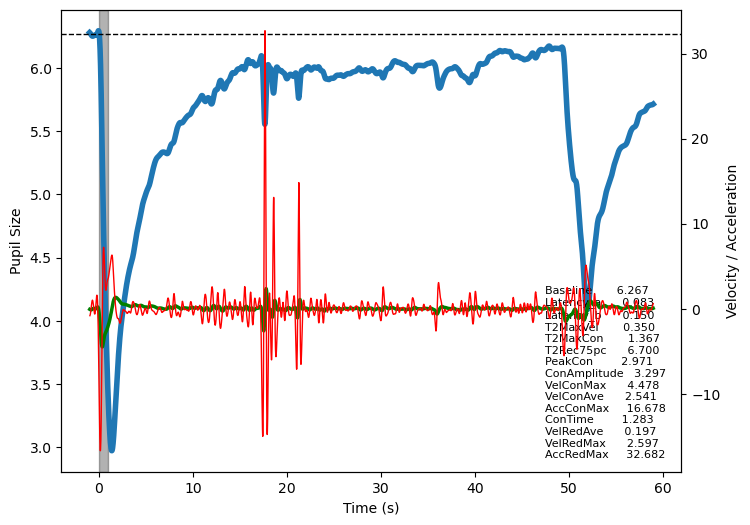

In [26]:
fig = plr.plot(vel=True, acc=True, print_params=True)
import os
if not os.path.exists(path_base + 'figures'):
    os.makedirs(path_base + 'figures')
# Save the figure in the folder
fig.savefig(path_base + 'figures/' + subj_base + '.png')

In [27]:
params = plr.parameters()
params

,value
Baseline,6.267350
Latency_a,0.083333
Latency_b,0.150000
T2MaxVel,0.350000
T2MaxCon,1.366667
T2Rec75pc,6.700000
PeakCon,2.970611
ConAmplitude,3.296739
VelConMax,4.478130
VelConAve,2.541056


In [28]:
df.to_csv(path_base + subj_base + '-processed.csv') # processed data with adjusted onset indices (time in seconds)

In [29]:
param_new=params.transpose()
param_new.reset_index(drop=True)

,Baseline,Latency_a,Latency_b,T2MaxVel,T2MaxCon,T2Rec75pc,PeakCon,ConAmplitude,VelConMax,VelConAve,AccConMax,ConTime,VelRedAve,VelRedMax,AccRedMax
0,6.26735,0.083333,0.15,0.35,1.366667,6.7,2.970611,3.296739,4.47813,2.541056,16.678321,1.283333,0.197273,2.596854,32.681999


In [30]:
param_new["subject_id"] = subject_id
param_new = param_new.set_index("subject_id")
param_new.to_csv(path_base + subj_base + '-plr-params.csv') # pupillary light response calculated parameters
param_new.to_csv(path_base + 'plr-60s-params.csv') # initiate new database with all subject data (REMOVE FOR OTHER FILES)